## Load the data and look at it.

In [2]:
# Load modules we'll need.
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

In [3]:
# Load the data.
data = loadmat('EEG-1.mat')    # Load the EEG data
EEG  = data['EEG'].reshape(-1) # Extract the EEG variable
t    = data['t'][0]            # ... and the t variablea

(0.5, 0.75)

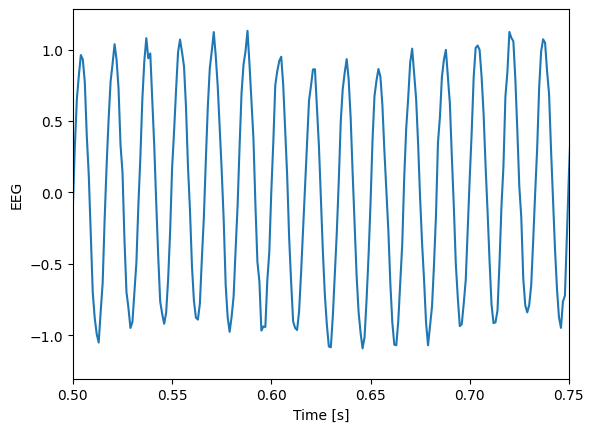

In [4]:
# Look at it.
plt.plot(t,EEG)
plt.xlabel('Time [s]')
plt.ylabel('EEG');
plt.xlim([0.5, 0.75])

In [5]:
#Q. What is the sampling interval (dt)?
dt = t[1] - t[0]
print(dt)

0.001


In [6]:
#Q. What is the sampling frequency (f0)?

f0 = 1/dt
print(f0)

1000.0


In [7]:
#Q. What is the number of points in the data (N)?

N = np.size(EEG)
print(N)

2000


In [8]:
#Q. What is the total time of the observation (T)?

T = N * dt
print(T)

2.0


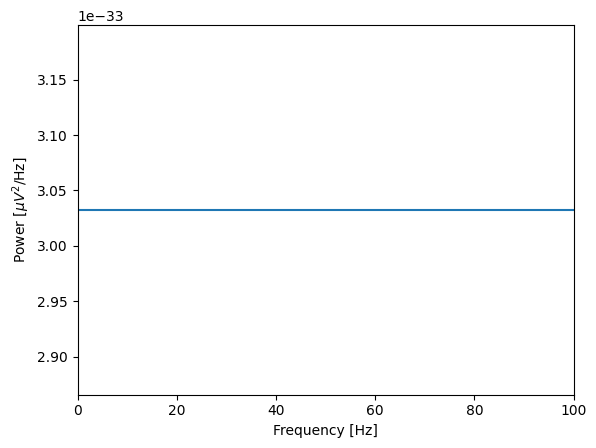

In [9]:
# Compute the spectrum "by hand".

# Q. What is the Nyquist frequency and frequency resolution?
fNQ = f0/2
df  = 1/T

# Q. What is the frequency axis?
fj  = np.arange(0,fNQ,df)

# Then, compute the Fourier transform "by hand".
x = EEG
X = np.ndarray(np.size(fj), complex);
for j in range( np.size(fj) ):
    X[j] = np.sum(x * np.exp(-2 * np.pi * 1j * fj[j] * T)) #1j is the square root of -1; replaces i in our Xj formula 

# And the spectrum,

Sxx = 2*dt**2/T * X * np.conj(X) #Sxx at frequency index j 

# Plot it,

plt.plot(fj, Sxx.real)
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]');

In [10]:
# Compute the power spectrum using the FFT function.
x  = EEG
xf = np.fft.fft(x)                        # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[0:int(N / 2)].real              # Ignore negative frequencies

In [ ]:
# Define the frequency axis

df  = [???]                  # Determine frequency resolution
fNQ = [???]                  # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)  # Construct frequency axis

In [12]:
# Plot the spectrum versus frequency.
# Q. What do you see?

plt.plot(faxis, Sxx)
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]');

NameError: name 'faxis' is not defined

In [11]:
# Plot the spectrum versus frequency on a decibel scale.
# Q. Now what do you see?

plt.figure()
plt.plot(faxis, 10*np.log10(Sxx))   # Plot the spectrum in decibels.
plt.xlim([0, 100])                               # Select the frequency range.
plt.ylim([-60, 0])                               # Select the decibel range.
plt.xlabel('Frequency [Hz]')                     # Label the axes.
plt.ylabel('Power [dB]');

NameError: name 'faxis' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the spectrum versus frequency on a logarithmic frequency axis.
# Q. And now what do you see?

plt.figure()
plt.[???]                                            # Log-log scale
plt.xlim([df, 100])                                  # Select frequency range
plt.ylim([-60, 0])                                   # ... and the decibel range.
plt.xlabel('Frequency [Hz]')                         # Label the axes.
plt.ylabel('Power [dB]');